In [51]:
from sklearn.model_selection import train_test_split 
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [52]:
df = pd.read_csv('data/merged_data.csv')

In [53]:
df.head()

,transcript_id,transcript_position,sequence,-1_flank_length,-1_flank_std,-1_flank_mean,central_length,central_std,central_mean,+1_flank_length,+1_flank_std,+1_flank_mean,gene_id,label
0,ENST00000000233,244,AAGACCA,0.00299,2.06,125.0,0.01770,10.40,122.0,0.00930,10.90,84.1,ENSG00000004059,0
1,ENST00000000233,244,AAGACCA,0.00631,2.53,125.0,0.00844,4.67,126.0,0.01030,6.30,80.9,ENSG00000004059,0
2,ENST00000000233,244,AAGACCA,0.00465,3.92,109.0,0.01360,12.00,124.0,0.00498,2.13,79.6,ENSG00000004059,0
3,ENST00000000233,244,AAGACCA,0.00398,2.06,125.0,0.00830,5.01,130.0,0.00498,3.78,80.4,ENSG00000004059,0
4,ENST00000000233,244,AAGACCA,0.00664,2.92,120.0,0.00266,3.94,129.0,0.01300,7.15,82.2,ENSG00000004059,0


In [54]:
df = df.drop(["transcript_id", "sequence", "gene_id"], axis=1)

# normalize dataset

In [55]:
scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(df)
print(d)

[[0.01286912 0.0112388  0.00954805 ... 0.05854327 0.28170732 0.        ]
 [0.01286912 0.03929356 0.01183064 ... 0.03352478 0.24268293 0.        ]
 [0.01286912 0.02526618 0.01858129 ... 0.01084497 0.22682927 0.        ]
 ...
 [0.09024403 0.04689877 0.02178664 ... 0.01166079 0.29634146 0.        ]
 [0.09024403 0.00845023 0.01085932 ... 0.02340861 0.19268293 0.        ]
 [0.09024403 0.03363191 0.01474459 ... 0.00899578 0.18536585 0.        ]]


In [56]:
df = pd.DataFrame(d, columns=df.columns)

In [57]:
df.head()

,transcript_position,-1_flank_length,-1_flank_std,-1_flank_mean,central_length,central_std,central_mean,+1_flank_length,+1_flank_std,+1_flank_mean,label
0,0.012869,0.011239,0.009548,0.649123,0.117647,0.050283,0.578164,0.075390,0.058543,0.281707,0.0
1,0.012869,0.039294,0.011831,0.649123,0.049729,0.022461,0.627792,0.085258,0.033525,0.242683,0.0
2,0.012869,0.025266,0.018581,0.448622,0.087575,0.058051,0.602978,0.032761,0.010845,0.226829,0.0
3,0.012869,0.019605,0.009548,0.649123,0.048702,0.024112,0.677419,0.032761,0.019819,0.236585,0.0
4,0.012869,0.042082,0.013725,0.586466,0.007335,0.018917,0.665012,0.111901,0.038148,0.258537,0.0


In [58]:
import pickle

# save the model to a file
with open('minmax_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# # load the model from the file
# with open('minmax_scaler.pkl', 'rb') as f:
#     scaler = pickle.load(f)

# balance label 1 and 0

In [59]:
len(df[df['label'] == 0])

10527532

In [60]:
len(df[df['label'] == 1])

499574

In [61]:
without_balance_test = df.sample(n=50000, random_state=4266)

In [62]:
without_balance_test.head()

,transcript_position,-1_flank_length,-1_flank_std,-1_flank_mean,central_length,central_std,central_mean,+1_flank_length,+1_flank_std,+1_flank_mean,label
844118,0.019170,0.025266,0.006440,0.461153,0.087575,0.015324,0.429280,0.070949,0.008506,0.370732,0.0
8464580,0.013350,0.106811,0.014890,0.686717,0.073639,0.026880,0.652605,0.042629,0.031023,0.271951,0.0
1424169,0.045763,0.053321,0.022758,0.461153,0.097110,0.014644,0.677419,0.016381,0.039779,0.236585,0.0
1891029,0.084958,0.098361,0.009160,0.385965,0.026918,0.015469,0.272953,0.032761,0.007473,0.342683,0.0
5409364,0.021787,0.092445,0.018387,0.561404,0.122048,0.059022,0.565757,0.078646,0.020689,0.217073,0.0


In [63]:
without_balance_test.to_csv('data/without_balance_test.csv', index=False)

In [43]:
ratio = 1 - 499574/10527532

       transcript_position  -1_flank_length   -1_flank_std  -1_flank_mean  \
count        999148.000000    999148.000000  999148.000000  999148.000000   
mean              0.071101         0.055463       0.021331       0.504919   
std               0.058691         0.046357       0.012460       0.135937   
min               0.000000         0.000000       0.000000       0.028822   
25%               0.032573         0.022562       0.012122       0.423559   
50%               0.056870         0.042589       0.017659       0.536341   
75%               0.094836         0.073010       0.027906       0.598997   
max               0.997330         0.949299       0.898012       0.987469   

       central_length    central_std   central_mean  +1_flank_length  \
count   999148.000000  999148.000000  999148.000000    999148.000000   
mean         0.048137       0.024937       0.468532         0.054532   
std          0.039331       0.014142       0.152827         0.043994   
min          0.000

<Axes: xlabel='label'>

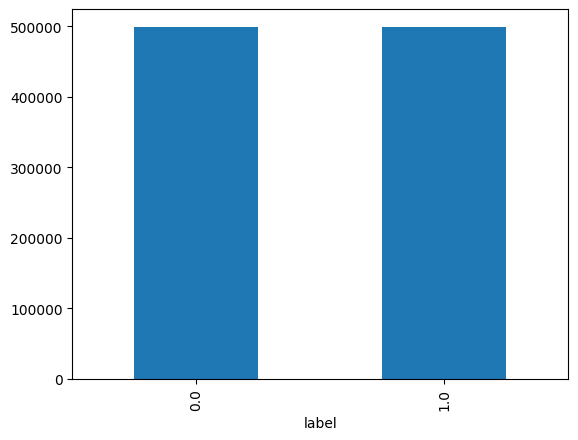

In [45]:
# Calculate the number of negative samples to remove (70% of total negatives)
num_negatives_to_remove = int(ratio * len(df[df['label'] == 0]))

# Get the indices of negative samples
negative_indices = df.index[df['label'] == 0]

# Randomly select and remove 70% of the negative samples
indices_to_remove = np.random.choice(negative_indices, size=num_negatives_to_remove, replace=False)
df = df.drop(indices_to_remove)

# Reset the index of the DataFrame (optional)
df.reset_index(drop=True, inplace=True)

# Print the updated DataFrame
print(df.describe())
df['label'].value_counts().plot(kind='bar')

# train test split

In [46]:
train, test = train_test_split(df, test_size=0.05)

In [47]:
len(train)

949190

In [48]:
len(test)

49958

In [49]:
train.head()

,transcript_position,-1_flank_length,-1_flank_std,-1_flank_mean,central_length,central_std,central_mean,+1_flank_length,+1_flank_std,+1_flank_mean,label
772214,0.017248,0.043603,0.015133,0.303258,0.046281,0.025908,0.540943,0.157292,0.014271,0.292683,1.0
612242,0.028835,0.091600,0.008091,0.172932,0.004841,0.010517,0.187345,0.047464,0.012803,0.273171,0.0
657324,0.020879,0.030505,0.024895,0.636591,0.080241,0.020713,0.215881,0.013124,0.006657,0.150000,0.0
326549,0.030491,0.008619,0.019795,0.373434,0.024718,0.032706,0.602978,0.013124,0.018024,0.239024,0.0
386681,0.084691,0.044955,0.036356,0.611529,0.024718,0.012313,0.354839,0.026248,0.007255,0.374390,1.0


In [50]:
train.to_csv('data/train_data_new.csv', index=False)
test.to_csv('data/test_data_new.csv', index=False)